<a href="https://colab.research.google.com/github/smitapatil1/Logistic-Regression/blob/main/Assignment_06_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [23]:
# Importing the dataset
data=pd.read_csv('/content/bank-full -2 new.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [24]:

data = data.dropna()
print(data.shape)
print(list(data.columns))

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


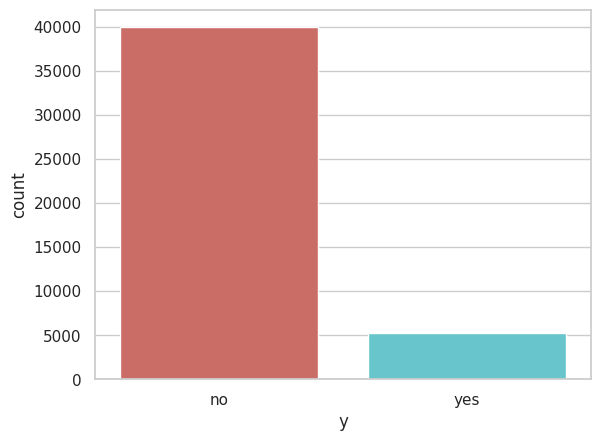

In [28]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [29]:
#Check the missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

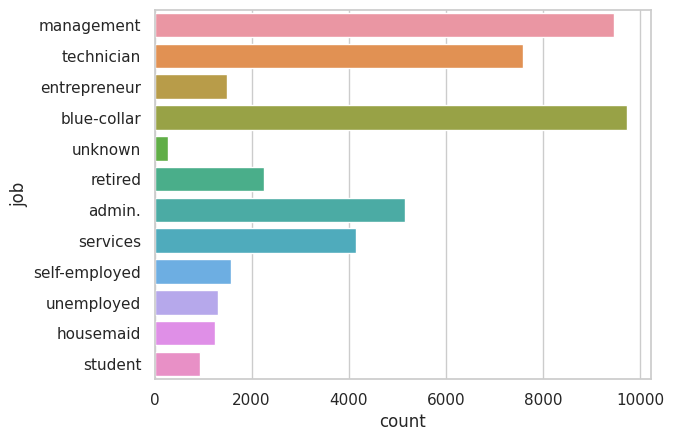

In [30]:
#Customer job distribution
sns.countplot(y="job", data=data)
plt.show()

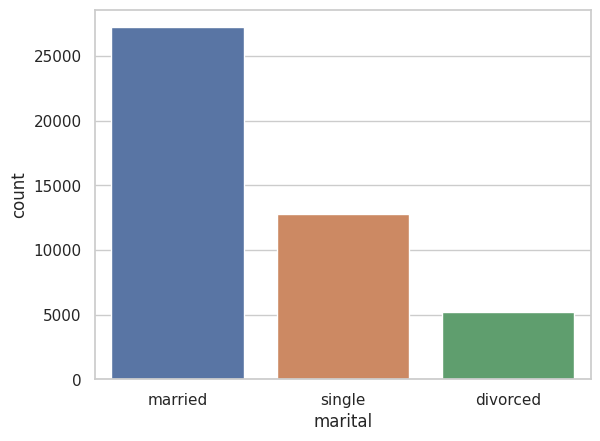

In [32]:
#Customer marital status distribution
sns.countplot(x="marital", data=data)
plt.show()

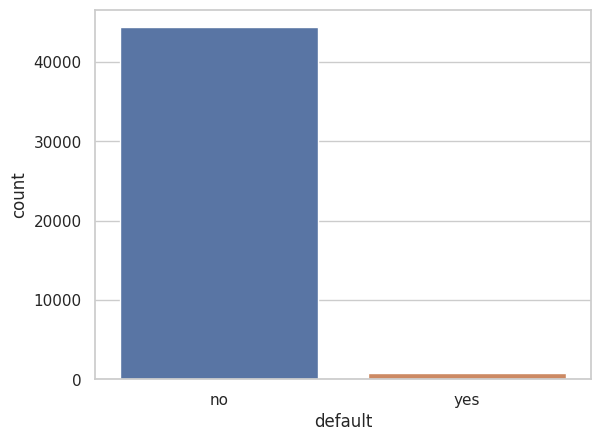

In [33]:
#Barplot for credit in default
sns.countplot(x="default", data=data)
plt.show()

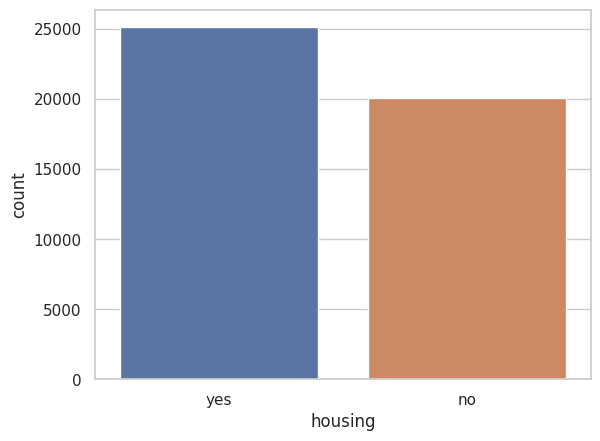

In [34]:
#Barplot for housing loan
sns.countplot(x="housing", data=data)
plt.show()

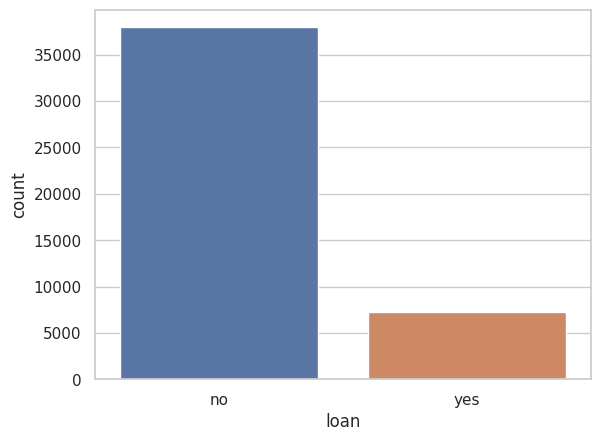

In [35]:
#Barplot for personal loan
sns.countplot(x="loan", data=data)
plt.show()

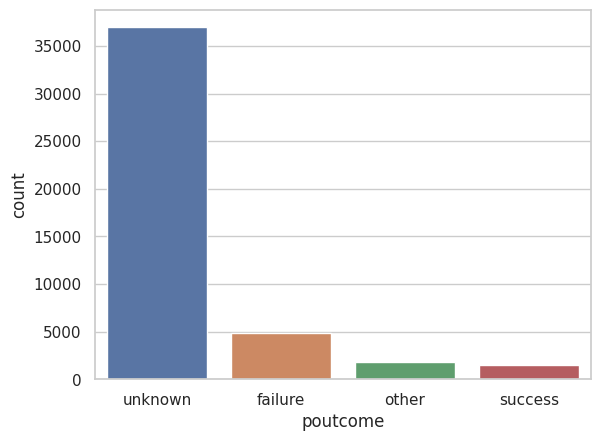

In [36]:
#Barplot for previous marketing campaign outcome
sns.countplot(x="poutcome", data=data)
plt.show()

Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. So, we will drop the variables that we do not need.

In [39]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        12740 non-null  int64  
 1   job        12740 non-null  object 
 2   marital    12739 non-null  object 
 3   education  12739 non-null  object 
 4   default    12739 non-null  object 
 5   balance    12739 non-null  float64
 6   housing    12739 non-null  object 
 7   loan       12739 non-null  object 
 8   contact    12739 non-null  object 
 9   day        12739 non-null  float64
 10  month      12739 non-null  object 
 11  duration   12739 non-null  float64
 12  campaign   12739 non-null  float64
 13  pdays      12739 non-null  float64
 14  previous   12739 non-null  float64
 15  poutcome   12739 non-null  object 
 16  y          12739 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 1.7+ MB


In [40]:
# One-Hot Encoding of categrical variables
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
data2

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,2143,unknown,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1
1,44,secondary,29,unknown,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1
2,33,secondary,2,unknown,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1
3,47,unknown,1506,unknown,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1
4,33,unknown,1,unknown,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,cellular,17,nov,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1
45207,71,primary,1729,cellular,17,nov,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
45208,72,secondary,5715,cellular,17,nov,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
45209,57,secondary,668,telephone,17,nov,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1


In [41]:
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['age', 'education', 'balance', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_self-employed', 'job_student',
       'job_technician', 'job_unknown', 'marital_divorced', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

<ipython-input-42-974a20bab8ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr())


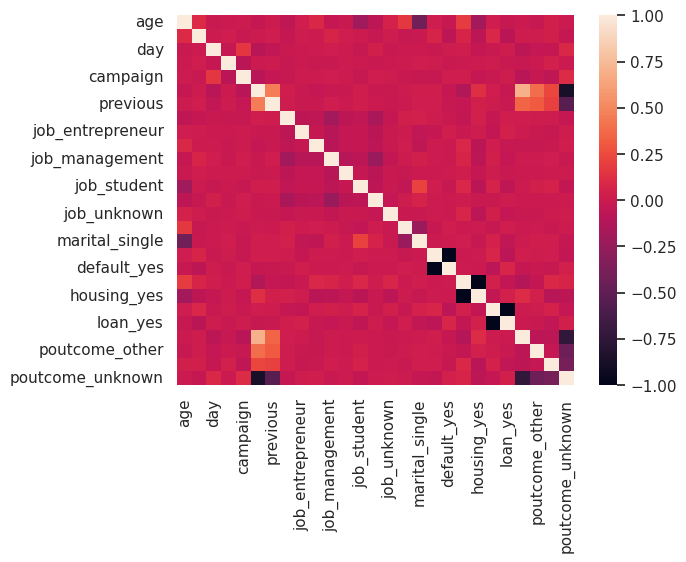

In [42]:
sns.heatmap(data2.corr())
plt.show()

In [44]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
X_train.shape


(33908, 30)

# Model Building

In [49]:
# Dividing our data into input and output variables
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

In [50]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy like 'median' or 'most_frequent'

# Fit and transform the imputer on your data
x_imputed = imputer.fit_transform(x)

# Now, fit your logistic regression model on the imputed data
classifier = LogisticRegression()
classifier.fit(x_imputed, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Predictions


In [51]:
# Assuming you've already imputed missing values as shown earlier
# Predict using the imputed data
y_pred = classifier.predict(x_imputed)
y_pred



array([0, 0, 0, ..., 0, 1, 0])

In [52]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12735,1,1
12736,0,0
12737,0,0
12738,0,1


# Testing Model Accuracy

In [53]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[12170,    94],
       [  345,   131]])

In [55]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(12170+131)/(12170+94+345+131)

0.965541601255887